# Fusion de fichiers

In [39]:
import pandas as pd

data_without_contrib = pd.read_csv("data_final.csv")
data_contrib = pd.read_csv("contributeurs.csv", index_col=0)
data = pd.merge(data_without_contrib, data_contrib, left_index=True, right_index=True)
data.to_csv("data.csv")
data.head()

,name,full_name,url,description,stars,created_at,language,forks,updated_at,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01 12:34:32+00:00,C,317,2023-06-23 10:17:49+00:00,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01 17:00:11+00:00,Kotlin,123,2023-06-21 22:24:04+00:00,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."
2,VIMKiller,caseykneale/VIMKiller,https://github.com/caseykneale/VIMKiller,Exiting VIM is hard; sometimes we need to take...,1159,2020-01-01 01:31:29+00:00,Julia,13,2023-06-21 16:37:23+00:00,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'caseykneale/VIMKiller', 'c..."
3,OpenSeeFace,emilianavt/OpenSeeFace,https://github.com/emilianavt/OpenSeeFace,Robust realtime face and facial landmark track...,1105,2020-01-01 12:49:35+00:00,Python,134,2023-06-23 11:37:45+00:00,"['cpu', 'csharp', 'depth-estimation', 'detecti...","{'key': 'bsd-2-clause', 'name': 'BSD 2-Clause ...",User,"{'src_repository': 'emilianavt/OpenSeeFace', '..."
4,react-typescript-web-extension-starter,aeksco/react-typescript-web-extension-starter,https://github.com/aeksco/react-typescript-web...,:desktop_computer: Web Extension starter kit b...,805,2020-01-01 01:14:35+00:00,JavaScript,73,2023-06-18 12:59:14+00:00,"['brave', 'chrome-extension', 'eslint', 'exten...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,{'src_repository': 'aeksco/react-typescript-we...


In [41]:
import pandas as pd

# Assuming data is your DataFrame
data['created_at']=pd.to_datetime(data['created_at']).dt.strftime('%Y-%m-%d')
data["updated_at"] = pd.to_datetime(data["updated_at"]).dt.strftime('%Y-%m-%d')

# Modèle Conceptuel de Données (MCD)

Cette étape va consister à définir les entités importantes dans le cadre de notre projet et les associations inhérentes. Les entités que nous avons trouvées sont les suivantes:

Projet (Project)

- Attributs :
- project_id (identifiant unique)
- name (nom du projet)
- full_name (nom complet du projet)
- url (URL du projet)
- description (description du projet)
- stars (nombre d'étoiles du projet)
- created_at (date de création du projet)
- forks (nombre de forks du projet)
- updated_at (date de dernière mise à jour du projet)
- type_of_owner (type de propriétaire du projet)

Langage (Language)
- Attributs
-  language_id (identifiant unique)
-  language_name (nom du langage).

Contributeur (Contributor)
- Attributs :
- contributor_id (identifiant unique)
- name (nom du contributeur)

Licence (License)
- Attributs :
-   license_id (identifiant unique)
-   license_name (nom de la licence)

Sujet (Topic)
- Attributs :
-   topic_id (identifiant unique)
-   topic_name (nom du sujet ou mot-clé)

# Modèle Logique des Données (MLD)

Cette étape va consiter à définir le type de relation entre les différents concepts.

Relations :

- Projet (Project) a plusieurs Contributors (Contributeurs) [Relation "plusieurs à plusieurs" via la table Participation]
- Projet (Project) est lié à une seule Licence (License) [Relation "1 à 1"]
- Projet (Project) peut être associé à plusieurs Sujets (Topics) [Relation "plusieurs à plusieurs" via la table Projet_Sujet]
- Projet (Project) est lié à un seul Langage (Language) [Relation "plusieurs à un" via la clé étrangère language_id]
- Contributor (Contributeur) participe à plusieurs Projects (Projets) [Relation "plusieurs à plusieurs" via la table Participation]
- License (Licence) est associée à plusieurs Projects (Projets) [Relation "1 à plusieurs"]

Sur la base de ces relations, nous établir le Modèle Logique de Données à travers un Diagramme d'entité relation. De nouvelles entités voient le jour pour implémenter les relations "plusieurs-à-plusieurs". Ces nouvelles entités sont les suivantes:

Participation (Participation) :

- Attributs :
-  project_id (clé étrangère vers l'entité Projet)
-  contributor_id (clé étrangère vers l'entité Contributor)

Projet_Sujet (Project_Topic) :
- Attributs :
-  project_id (clé étrangère vers l'entité Projet)
-  topic_id (clé étrangère vers l'entité Sujet)

Avec le,SGBDR PostgreSQL, nous avons générer l'ERD (le diagramme d'entité relation)

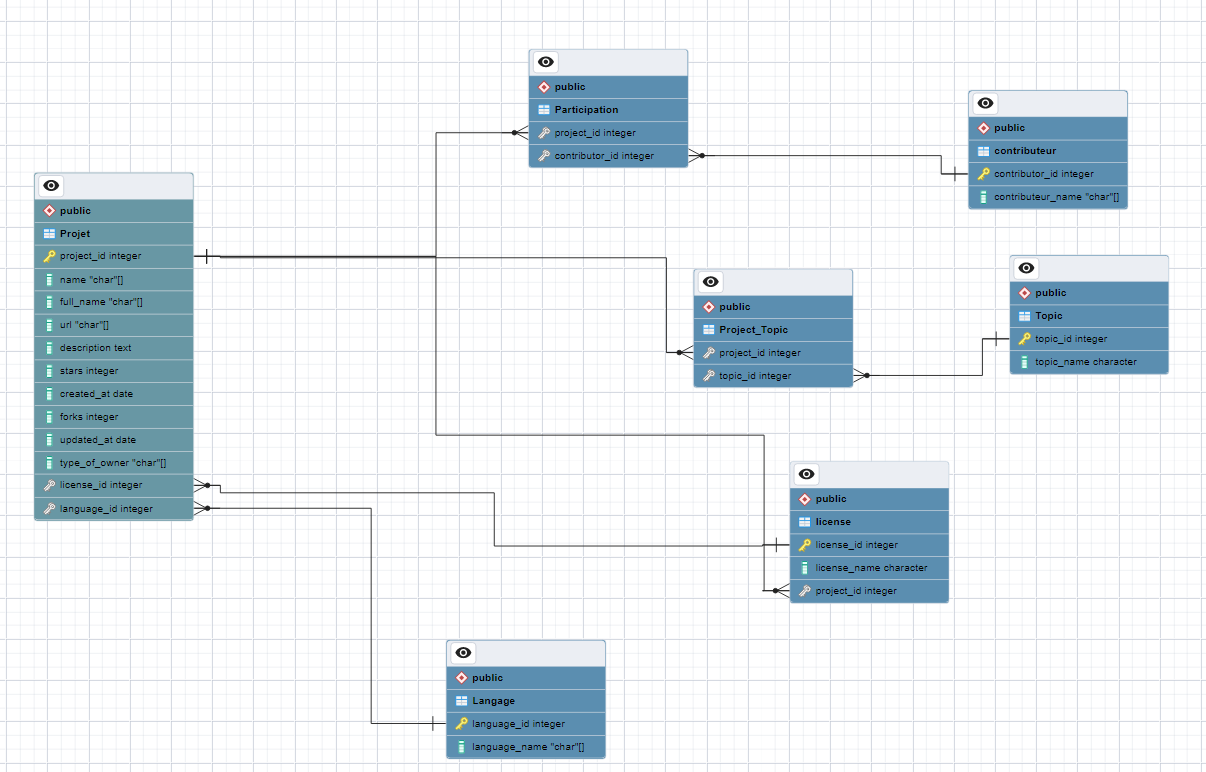

# Modèle Physique de Données (MPD)

Cette étape va consister à faire des scripts créer et gérer la base de données

In [33]:
import pyodbc

connexion = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='LAPTOP-L0N961TQ\SQLEXPRESS',
    Database='GitHub_Database'
)

In [29]:
# curseur
# cursor = connexion.cursor()

# Langage de Définition (LDD) (voir le fichier .sql associé)

### Création des tables entités

In [ ]:
# # Création de la table Depots
# cursor.execute("CREATE TABLE Depots ( id_repo INTEGER PRIMARY KEY, nom NVARCHAR(255), etoiles INTEGER, url NVARCHAR(255), description NVARCHAR(MAX), created_at DATE, forks INTEGER, watchers INTEGER, updated_at DATE, type_of_owner NVARCHAR(255) );")

In [ ]:
# # Création de la table Contributeurs
# cursor.execute("CREATE TABLE Contributeurs (id_contrib INT PRIMARY KEY,contrib_nom NVARCHAR(255));")

In [ ]:
# # Création de la table Topics
# cursor.execute("CREATE TABLE Topics (topic_id INT PRIMARY KEY,topic_name NVARCHAR(255));")

In [ ]:
# # Création de la table Licenses
# cursor.execute("CREATE TABLE Licenses (license_id INT PRIMARY KEY,license_name NVARCHAR(255));")

### Création des tables-relations

In [ ]:
# # Création de la table-relation Depot-Licenses
# cursor.execute("CREATE TABLE DepotsLicenses (repo_id INT,license_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (license_id) REFERENCES Licenses(license_id));")

In [ ]:
# # Création de la table-relation Depot-Contributeurs
# cursor.execute("CREATE TABLE DepotsContributeurs (repo_id INT,contrib_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (contrib_id) REFERENCES Contributeurs(id_contrib)
# );")

In [ ]:
# # Création de la table-relation Depot-Topics
# cursor.execute("CREATE TABLE DepotsTopics (repo_id INT,topic_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (topic_id) REFERENCES Topics(topic_id));")

# Langage de Manipultion de Données

In [21]:
data.head(2)

,name,full_name,url,description,stars,created_at,language,forks,updated_at,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01 12:34:32+00:00,C,317,2023-06-23 10:17:49+00:00,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01 17:00:11+00:00,Kotlin,123,2023-06-21 22:24:04+00:00,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."


In [51]:
import csv
import pyodbc
from datetime import datetime
import pandas as pd

# Établir la connexion à la base de données
connexion = pyodbc.connect(Trusted_Connection='Yes',
                            Driver='{ODBC Driver 17 for SQL Server}',
                            Server='LAPTOP-L0N961TQ\SQLEXPRESS',
                            Database='GitHub_Database')

cursor = connexion.cursor()

# Chemin vers le fichier de données
data_file_path = "data.csv"

# Lecture du fichier de données avec pandas
data_df = pd.read_csv(data_file_path, encoding='utf-8')

# Parcourir les lignes du fichier
for index, row in data_df.iterrows():
    # Récupérer les valeurs des colonnes
    project_id = int(row[0])
    nom = row['name']
    full_name = row['full_name']
    url_link = row['url']
    descriptif = row['description']
    stars = int(row['stars'])
    created_at = datetime.strptime(row['created_at'], "%Y-%m-%d %H:%M:%S+00:00").strftime("%Y-%m-%d %H:%M:%S")
    language_name = row['language']
    forks = int(row['forks'])
    updated_at = datetime.strptime(row['updated_at'], "%Y-%m-%d %H:%M:%S+00:00").strftime("%Y-%m-%d %H:%M:%S")
    topics = eval(row['topics'])  # Convertir la chaîne JSON en liste Python
    license_name = eval(row['license'])["name"]
    type_of_owner = row['type_of_owner']
    contributor_name = eval(row['contributors'])["contributor"]

    # Requête d'insertion des données dans la table Licence
    query_license = "INSERT INTO Licence (license_name) VALUES (?)"
    params_license = (license_name,)
    cursor.execute(query_license, params_license)

    # Requête d'insertion des données dans la table Langage
    query_language = "INSERT INTO Langage (language_name) VALUES (?)"
    params_language = (language_name,)
    cursor.execute(query_language, params_language)

    # Requête d'insertion des données dans la table Contributeur
    query_contributor = "INSERT INTO Contributeur (contributor_name) VALUES (?)"
    params_contributor = (contributor_name,)
    cursor.execute(query_contributor, params_contributor)

    # Requête d'insertion des données dans la table Projet
    query_projet = "INSERT INTO Projet (project_id, nom, full_name, url_link, descriptif, stars, created_at, language_id, forks, updated_at, type_of_owner, license_id) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
    params_projet = (project_id, nom, full_name, url_link, descriptif, stars, created_at, project_id, forks, updated_at, type_of_owner, project_id)
    cursor.execute(query_projet, params_projet)

    # Requête d'insertion des données dans la table Participation
    query_participation = "INSERT INTO Participation (project_id, contributor_id) VALUES (?, ?)"
    params_participation = (project_id, project_id)
    cursor.execute(query_participation, params_participation)

    # Insérer les données dans la table Projet_Sujet (s'il y a des sujets associés au projet)
    if topics:
        for topic in topics:
            # Requête d'insertion des données dans la table Sujet
            query_sujet = "INSERT INTO Sujet (topic_name) VALUES (?)"
            params_sujet = (topic,)
            cursor.execute(query_sujet, params_sujet)

            # Requête d'insertion des données dans la table Projet_Sujet
            query_projet_sujet = "INSERT INTO Projet_Sujet (project_id, topic_id) VALUES (?, ?)"
            params_projet_sujet = (project_id, project_id)
            cursor.execute(query_projet_sujet, params_projet_sujet)

# Valider les changements dans la base de données
connexion.commit()

# Fermeture du curseur et de la connexion à la base de données
cursor.close()
connexion.close()


IntegrityError: ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Impossible d'insérer la valeur NULL dans la colonne 'license_id', table 'GitHub_Database.dbo.Licence'. Cette colonne n'accepte pas les valeurs NULL. Échec de INSERT. (515) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]L'instruction a été arrêtée. (3621)")

In [53]:
data["license"].isna().sum()

0